In [1]:
import pydicom as dcm
import numpy as np
from scipy import ndimage
from skimage import filters, morphology, data, measure, exposure, io, color
from matplotlib import pyplot as plt

In [2]:
def plot_img(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap = plt.cm.gray)
    plt.show()

In [3]:
img_c = io.imread("images/normal-bovine-erythrocytes.jpg")

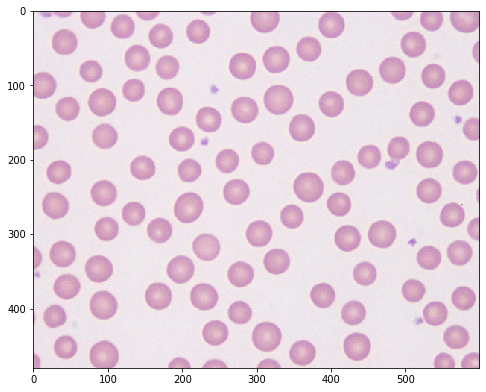

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(img_c)
plt.show()

In [5]:
img = color.rgb2gray(img_c)

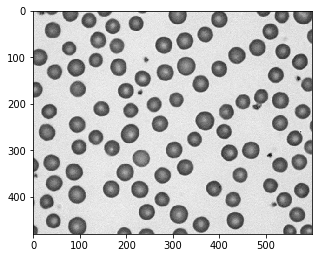

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(img, cmap = plt.cm.gray)
plt.show()

In [7]:
img_neg = 1 - img

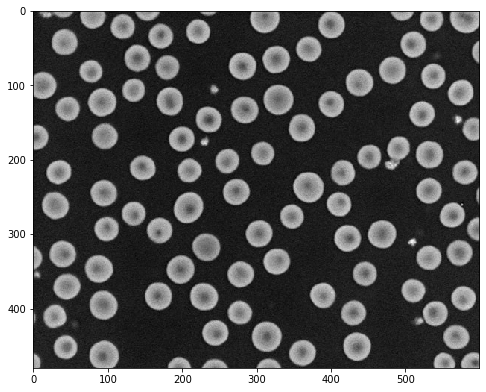

In [10]:
plot_img(img_neg)

In [11]:
thresh = filters.threshold_otsu(img_neg)
thresh

0.20301744408700978

In [14]:
img_bin = img_neg > thresh

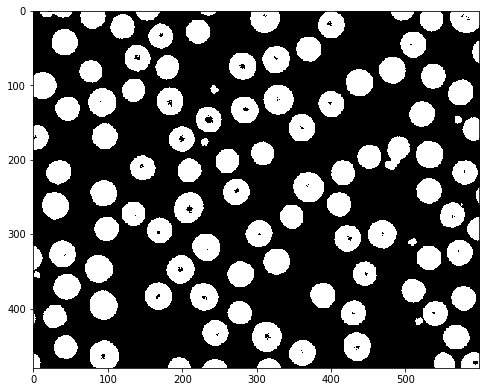

In [15]:
plot_img(img_bin)

In [16]:
selem = morphology.disk(2)
selem

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [17]:
img_closed = morphology.binary_closing(img_bin, selem)
img_closed = ndimage.morphology.binary_fill_holes(img_closed)

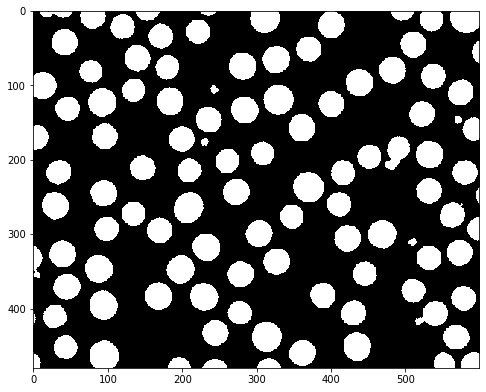

In [19]:
plot_img(img_closed)

In [20]:
selem = morphology.disk(6)
img_opened = morphology.binary_opening(img_closed, selem)

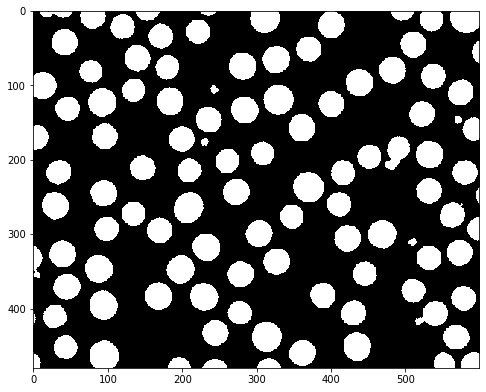

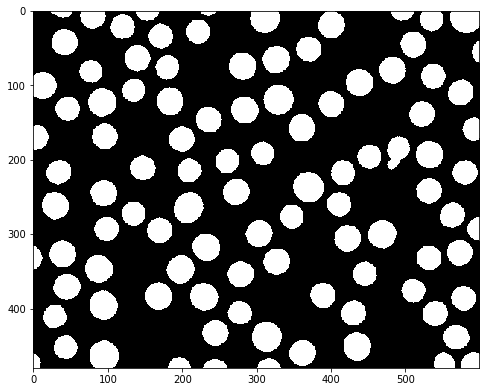

In [21]:
plot_img(img_closed)
plot_img(img_opened)

In [34]:
img_ccl = measure.label(img_opened)

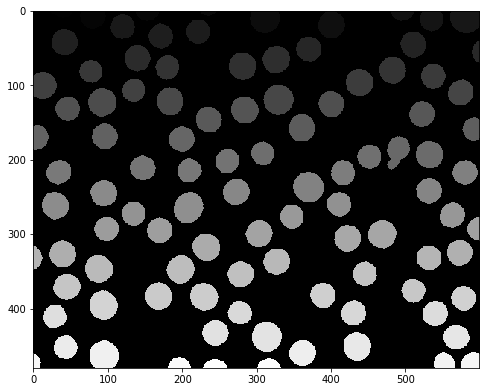

In [37]:
plot_img(img_ccl)

In [53]:
labels = np.unique(img_ccl)
labels = labels[1:]
labels

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [54]:
areas = []

for label in labels:
    mask = img_ccl == label
    obj = img_ccl[mask]
    areas.append(obj.shape[0])

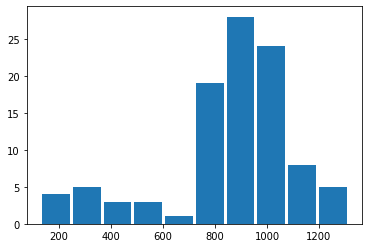

In [62]:
plt.hist(areas, bins=10, rwidth=0.9)
plt.show()

In [70]:
D = measure.regionprops(img_ccl)
D